In [57]:
import pandas as pd
import numpy as np
cluster = pd.read_csv('nodes(1.8).csv')
cluster.drop(columns='Label',inplace=True)
features = pd.read_csv('large_twitch_features.csv')
edges= pd.read_csv('large_twitch_edges.csv')

In [12]:
cluster

,Id,modularity_class
0,98343,2
1,141493,2
2,58736,2
3,140703,2
4,151401,2
...,...,...
168109,131422,0
168110,102494,2
168111,157597,0
168112,128281,2


In [17]:
merged_nodes= pd.merge(features, cluster, left_on= 'numeric_id',right_on= 'Id')

In [58]:
dead_accounts = features[features['dead_account'] == 1]
active_accounts = features[features['dead_account'] == 0]


In [63]:
num_dead_accounts = len(dead_accounts)
active_accounts_sampled = active_accounts.sample(n=num_dead_accounts, random_state=42)
user_ids_of_active_accounts_sampled = active_accounts_sampled['numeric_id']

In [66]:

sampled_edges_active = edges[
    edges['numeric_id_1'].isin(user_ids_of_active_accounts_sampled) | 
    edges['numeric_id_2'].isin(user_ids_of_active_accounts_sampled)
]
sampled_edges_active.columns =['source','target']

sampled_edges_active

,source,target
65,141493,17293
82,141493,42097
85,141493,18259
136,141493,91804
226,141493,119611
...,...,...
6797324,73416,164575
6797338,75948,100794
6797426,6601,128748
6797457,123025,99385


In [72]:

unique_nodes = pd.unique(sampled_edges_active[['source', 'target']].values.ravel('K'))
node_info = features[features['numeric_id'].isin(unique_nodes)]
# Add a column to highlight nodes that are part of the active accounts sample
node_info['is_active_sample'] = node_info['numeric_id'].isin(user_ids_of_active_accounts_sampled)
active_accounts_sampled = node_info[['numeric_id', 'is_active_sample']].rename(columns={'numeric_id': 'Id'})

C:\Users\fangz\AppData\Local\Temp\ipykernel_5160\2835971756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  node_info['is_active_sample'] = node_info['numeric_id'].isin(user_ids_of_active_accounts_sampled)


False    95114
True      5159
Name: is_active_sample, dtype: int64

In [73]:
sampled_edges_active.to_csv('sampled_edges_active.csv', index= False)
active_accounts_sampled.to_csv('active_accounts_sampled.csv', index= False)

In [75]:
user_ids_of_dead_accounts = dead_accounts['numeric_id']

filtered_edges = edges[
    edges['numeric_id_1'].isin(user_ids_of_dead_accounts) |
    edges['numeric_id_2'].isin(user_ids_of_dead_accounts)
]
filtered_edges.columns =['source','target']
filtered_edges

,source,target
41,141493,54013
54,141493,141930
122,141493,152100
138,141493,102090
141,141493,167840
...,...,...
6797523,44931,98827
6797525,56717,48216
6797526,28160,84939
6797534,143311,57681


In [ ]:
filtered_edges.to_csv('filtered_edges.csv',index= True)

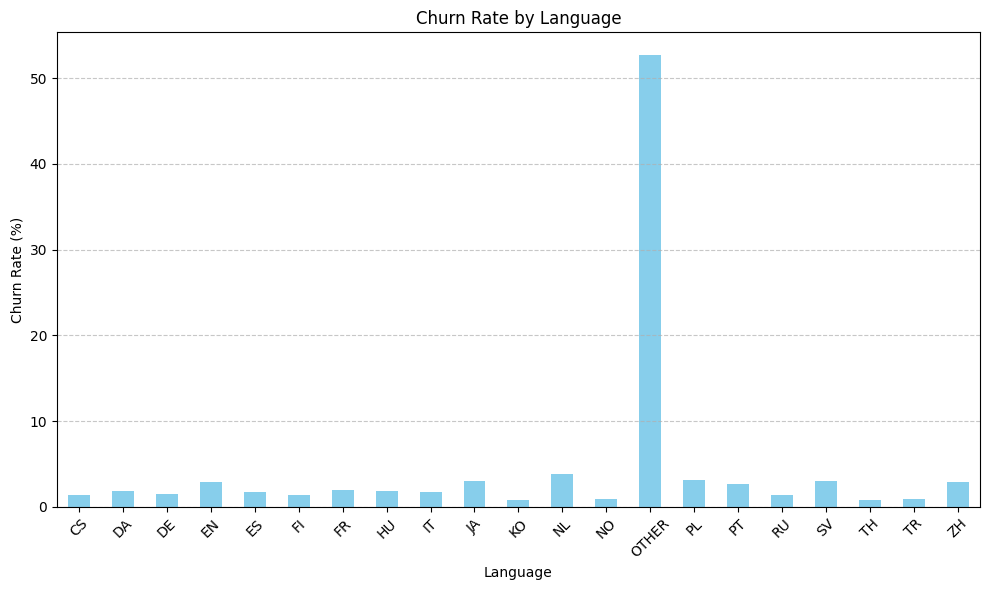

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
language_churn_rate = merged_nodes.groupby('language')['dead_account'].mean() * 100

# Plotting
plt.figure(figsize=(10, 6))
language_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Language')
plt.xlabel('Language')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
features_renamed = features.rename(columns={'numeric_id': 'Id', 'dead_account': 'label'})

# Dropping all other columns except 'Id' and 'label'
features_final = features_renamed[['Id', 'label']]
features_final.to_csv('features_final.csv',index= False)